In [6]:
%load_ext autoreload
%autoreload 2

from test_repo_biometric import *
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# get the file names
train_files, test_files = train_test_all_ids('/data/home/shruti/voxceleb/vgg/leaders/')

# results

In [8]:

def GG_beh(fldr, fl_nm, in_act):
    
    # if folder is orig, then just return the in_act
    if 'orig' in fldr:
        return in_act
    else:
        return 'GG_' + fl_nm[:2]# else return the first id

def FF_beh(fldr, fl_nm, in_act):
    
    # if folder is orig, then just return the in_act
    if 'orig' in fldr:
        return in_act
    else:
        return 'FF_' + fl_nm[:3]# else return the first id

def ldr_beh(fldr, fl_nm, in_act):
    
    # if folder is orig, then just return the in_act
    if 'faceswap' in fldr:
        return in_act + '_imposter'
    else:
        return in_act
    
def stv_beh(fldr, fl_nm, in_act):
    
    # if folder is orig, then just return the in_act
    if fldr == 'jennifer_l' or fldr == 'steve_b':
        return in_act
    else:
        return 'jen_l'

# function to give number of time the vgg/fabnet went to face, behaviour, other
def get_face_behave_id(in_name, in_act):
    
    fldr, fl_nm = in_name.split('/')
    pref_dict = {'GG': GG_beh, 'FF': FF_beh, 'bo': ldr_beh, 
            'bs': ldr_beh, 'dt': ldr_beh, 'ew': ldr_beh, 
            'hc': ldr_beh, 'jb': ldr_beh, 'steve_b': stv_beh, 'jen_l': stv_beh}
    
    # get the actual category
    all_pref = list(pref_dict.keys())
    cur_pref = [all_pref[i] for i in range(len(all_pref)) if all_pref[i] in in_act]
    
    assert len(cur_pref) == 1, 'only one prefix should be matched'
    
    return pref_dict[cur_pref[0]](fldr, fl_nm, in_act)

def get_percent_in_df(in_df_name):
    
    in_df = pd.read_csv(in_df_name)
    flnms = np.array(in_df['fileName'])
    face_id = np.array(in_df['actualLabel_vgg'])
    behav_id = np.array([get_face_behave_id(flnms[i], face_id[i]) for i in range(len(flnms))])
    vgg_id = np.array(in_df['predLabel_vgg'])
    fab_id = np.array(in_df['predLabel_fab'])
    
    out_dict = {}
    out_dict['consistent'] = len(np.argwhere(vgg_id == fab_id).ravel())/len(vgg_id)
    out_dict['vgg_face'] = len(np.argwhere(vgg_id == face_id).ravel())/len(vgg_id)
    out_dict['vgg_behav'] = len(np.argwhere(vgg_id == behav_id).ravel())/len(vgg_id)
    out_dict['vgg_other'] = len(np.argwhere((vgg_id != behav_id) & (vgg_id != face_id) ).ravel())/len(vgg_id)
    
    out_dict['fab_face'] = len(np.argwhere(fab_id == face_id).ravel())/len(vgg_id)
    out_dict['fab_behav'] = len(np.argwhere(fab_id == behav_id).ravel())/len(vgg_id)
    out_dict['fab_other'] = len(np.argwhere((fab_id != behav_id) & (fab_id != face_id) ).ravel())/len(vgg_id)
    
    return out_dict

# a plot with ids on the x axis, y axis is vgg/fabnet
def print_result_row(in_df, r_or_f):
    
    out_dict = get_percent_in_df(in_df)
    
    if r_or_f == 'fake':
        print('{0}\t|\t{1:0.2f}\t{2:0.2f}\t{3:0.2f}\t|\t{4:0.2f}\t{5:0.2f}\t{6:0.2f}\t|\t{7:0.2f}'.
              format(r_or_f, out_dict['vgg_face'], out_dict['vgg_behav'], out_dict['vgg_other'],
                     out_dict['fab_face'], out_dict['fab_behav'], out_dict['fab_other'], out_dict['consistent']))
        print('---------------------------------------------------------------------------------------------------')
    else:
        print('{0}\t|\t{1:0.2f}\tNA\t{2:0.2f}\t|\tNA\t{3:0.2f}\t{4:0.2f}\t|\t{5:0.2f}'.
              format(r_or_f, out_dict['vgg_face'], out_dict['vgg_other'],
                     out_dict['fab_face'], out_dict['fab_other'], out_dict['consistent']))
        print('---------------------------------------------------------------------------------------------------')

## Numbers

### metric learning

In [9]:
def result_per_db():
    
    print('Leaders')
    
    print('\t\t\tVGG\t\t\t\tFabnet\t\t\tConsistent\n')
    print('\t\tFaceId\tBehvId\tOther\t\tFaceId\tBehvId\tOther\n')
    print_result_row('ldr_real_100.csv', 'real')
    print_result_row('ldr_fake_100.csv', 'fake')

    print('FaceForensic \n')
    print_result_row('FF_real_100.csv', 'real')
    print_result_row('FF_fake_100.csv', 'fake')

    print('Google \n')
    print_result_row('GG_real_100.csv', 'real')
    print_result_row('GG_fake_100.csv', 'fake')
    
    print('Jennifer \n')
    print_result_row('SJ_real_100.csv', 'real')
    print_result_row('SJ_fake_100.csv', 'fake')
    
    
result_per_db()

Leaders
			VGG				Fabnet			Consistent

		FaceId	BehvId	Other		FaceId	BehvId	Other

real	|	1.00	NA	0.00	|	NA	1.00	0.00	|	1.00
---------------------------------------------------------------------------------------------------
fake	|	0.96	0.04	0.00	|	0.01	0.98	0.00	|	0.05
---------------------------------------------------------------------------------------------------
FaceForensic 

real	|	1.00	NA	0.00	|	NA	0.99	0.01	|	0.99
---------------------------------------------------------------------------------------------------
fake	|	0.79	0.02	0.19	|	0.03	0.55	0.42	|	0.04
---------------------------------------------------------------------------------------------------
Google 

real	|	1.00	NA	0.00	|	NA	0.93	0.07	|	0.93
---------------------------------------------------------------------------------------------------
fake	|	0.49	0.38	0.13	|	0.00	0.96	0.04	|	0.37
---------------------------------------------------------------------------------------------------
Jennifer 

real	|	1.00	NA	0.0

### no time

In [5]:
def result_per_db_notime():
    
    print('Leaders')
    
    print('\t\t\tVGG\t\t\t\tFabnet\t\t\tConsistent\n')
    print('\t\tFaceId\tBehvId\tOther\t\tFaceId\tBehvId\tOther\n')
    print_result_row('ldr_real_notime.csv', 'real')
    print_result_row('ldr_fake_notime.csv', 'fake')

    print('FaceForensic \n')
    print_result_row('FF_real_notime.csv', 'real')
    print_result_row('FF_fake_notime.csv', 'fake')

    print('Google \n')
    print_result_row('GG_real_notime.csv', 'real')
    print_result_row('GG_fake_notime.csv', 'fake')
    
    print('Jennifer \n')
    print_result_row('SJ_real_notime.csv', 'real')
    print_result_row('SJ_fake_notime.csv', 'fake')
    
result_per_db_notime()

Leaders
			VGG				Fabnet			Consistent

		FaceId	BehvId	Other		FaceId	BehvId	Other

real	|	1.00	NA	0.00	|	NA	1.00	0.00	|	1.00
---------------------------------------------------------------------------------------------------
fake	|	0.88	0.10	0.01	|	0.00	1.00	0.00	|	0.10
---------------------------------------------------------------------------------------------------
FaceForensic 

real	|	1.00	NA	0.00	|	NA	0.96	0.04	|	0.96
---------------------------------------------------------------------------------------------------
fake	|	0.70	0.02	0.28	|	0.01	0.68	0.31	|	0.03
---------------------------------------------------------------------------------------------------
Google 

real	|	0.97	NA	0.03	|	NA	0.84	0.16	|	0.87
---------------------------------------------------------------------------------------------------
fake	|	0.46	0.37	0.16	|	0.00	0.95	0.05	|	0.37
---------------------------------------------------------------------------------------------------
Jennifer 

real	|	0.99	NA	0.0

## VGG Pool Fab Pool

In [ ]:
temp = pd.read_csv('FF_real_vggfabpool.csv')

In [ ]:
temp[temp['actualLabel_vgg']=='FF_026']

In [ ]:
def result_per_db_vggfabpool():
    
    
    print('\t\t\tVGG\t\t\t\tFabnet\t\t\tConsistent\n')
    print('\t\tFaceId\tBehvId\tOther\t\tFaceId\tBehvId\tOther\n')

    print('Leaders \n')
    print_result_row('ldr_real_vggfabpool.csv', 'real')
    print_result_row('ldr_fake_vggfabpool.csv', 'fake')

    print('FaceForensic \n')
    print_result_row('FF_real_vggfabpool.csv', 'real')
    print_result_row('FF_fake_vggfabpool.csv', 'fake')
    
    print('Google \n')
    print_result_row('GG_real_vggfabpool.csv', 'real')
    print_result_row('GG_fake_vggfabpool.csv', 'fake')
    
    print('Jennifer \n')
    print_result_row('SJ_real_vggfabpool.csv', 'real')
    print_result_row('SJ_fake_vggfabpool.csv', 'fake')
    
result_per_db_vggfabpool()

## Plots

In [6]:
all_lbls = ['GG_{0:02d}'.format(f+1) for f in range(28)] + ['bo','bs','dt','ew','hc','jb'] + ['FF_{0:03d}'.format(f) for f in range(1000)] + ['jen_l'] + ['steve_b']
all_lbls = np.array(all_lbls)


In [7]:
def get_consistent_in_df(in_df):
    
    flnms = np.array(in_df['fileName'])
    face_id = np.array(in_df['actualLabel_vgg'])
    behav_id = np.array([get_face_behave_id(flnms[i], face_id[i]) for i in range(len(flnms))])
    vgg_id = np.array(in_df['predLabel_vgg'])
    fab_id = np.array(in_df['predLabel_fab'])
    
    out_dict = {}
    out_dict['Consistent'] = len(np.argwhere(vgg_id == fab_id).ravel())/len(vgg_id)
    out_dict['Face_const'] = len(np.argwhere((vgg_id == fab_id) & (vgg_id == face_id)).ravel())/len(vgg_id)
    out_dict['Behav_const'] = len(np.argwhere((vgg_id == fab_id) & (vgg_id == behav_id)).ravel())/len(vgg_id)
    out_dict['Other_const'] = len(np.argwhere((vgg_id == fab_id) & 
                                              (vgg_id != behav_id) & 
                                             (vgg_id != face_id)).ravel())/len(vgg_id)
    return out_dict
    

def get_xy_data(in_file_list):
    
    full_df = {}
    for f in in_file_list:
        full_df[f] = pd.read_csv(f)
        
    full_df = pd.concat(list(full_df.values()), ignore_index=True, sort=False)
    
    # get all the labls
    Y = {}
    Y['Consistent'] = np.zeros((len(all_lbls), ))
    Y['Face_const'] = np.zeros((len(all_lbls), ))
    Y['Behav_const'] = np.zeros((len(all_lbls), ))
    Y['Other_const'] = np.zeros((len(all_lbls), ))
    
    for l in range(len(all_lbls)):
        
        if len(full_df[full_df['actualLabel_vgg']==all_lbls[l]])>5:
            cur_dict = get_consistent_in_df(full_df[full_df['actualLabel_vgg']==all_lbls[l]])
            Y['Consistent'][l] = cur_dict['Consistent']
            Y['Face_const'][l] = cur_dict['Face_const']
            Y['Behav_const'][l] = cur_dict['Behav_const']
            Y['Other_const'][l] = cur_dict['Other_const']
            
        else:
            print(all_lbls[l])
            Y['Consistent'][l] = np.NaN
            Y['Face_const'][l] = np.NaN
            Y['Behav_const'][l] = np.NaN
            Y['Other_const'][l] = np.NaN
        
    return Y
    
def plot_consistent(in_real, in_fake, in_lbls, ttl, style='-'):
    
    fig, ax = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0}, figsize=(20, 10))
    fig.suptitle(ttl)
    lbls_idx = np.argwhere(np.isin(all_lbls, in_lbls)).ravel()
    x = np.arange(len(lbls_idx))
    ax[0].plot(x, in_real['Consistent'][lbls_idx], style, label='real')
    ax[0].plot(x, in_fake['Consistent'][lbls_idx], style, label='fake')
    ax[0].legend()
    ax[0].set_ylabel('Consistent')
    ax[0].grid(True, axis='both')

    ax[1].plot(x, in_real['Face_const'][lbls_idx], style, label='real')
    ax[1].plot(x, in_fake['Face_const'][lbls_idx], style, label='fake')
    ax[1].set_ylabel('Face Consistent')
    ax[1].grid(True, axis='both')

    ax[2].plot(x, in_real['Behav_const'][lbls_idx], style, label='real')
    ax[2].plot(x, in_fake['Behav_const'][lbls_idx], style, label='fake')
    ax[2].set_ylabel('Behav Consistent')
    ax[2].grid(True, axis='both')    

    ax[2].set_xlim([0, len(lbls_idx)])
    if len(x)>100:
        ax[2].set_xticks(range(0, len(x), 10))
        ax[2].set_xticklabels(all_lbls[lbls_idx[::10]], rotation=90, fontdict={'fontsize': 8})
    else:
        ax[2].set_xticks(range(0, len(x)))
        ax[2].set_xticklabels(all_lbls[lbls_idx], rotation=90, fontdict={'fontsize': 10})

    plt.show()

steve_b
jen_l


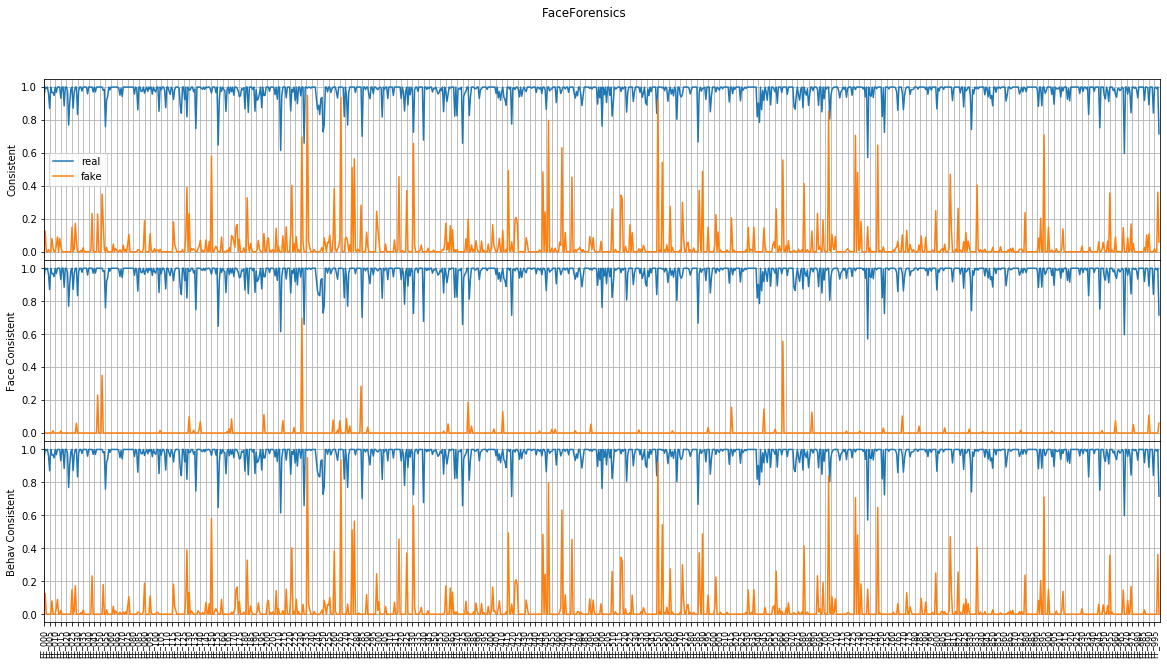

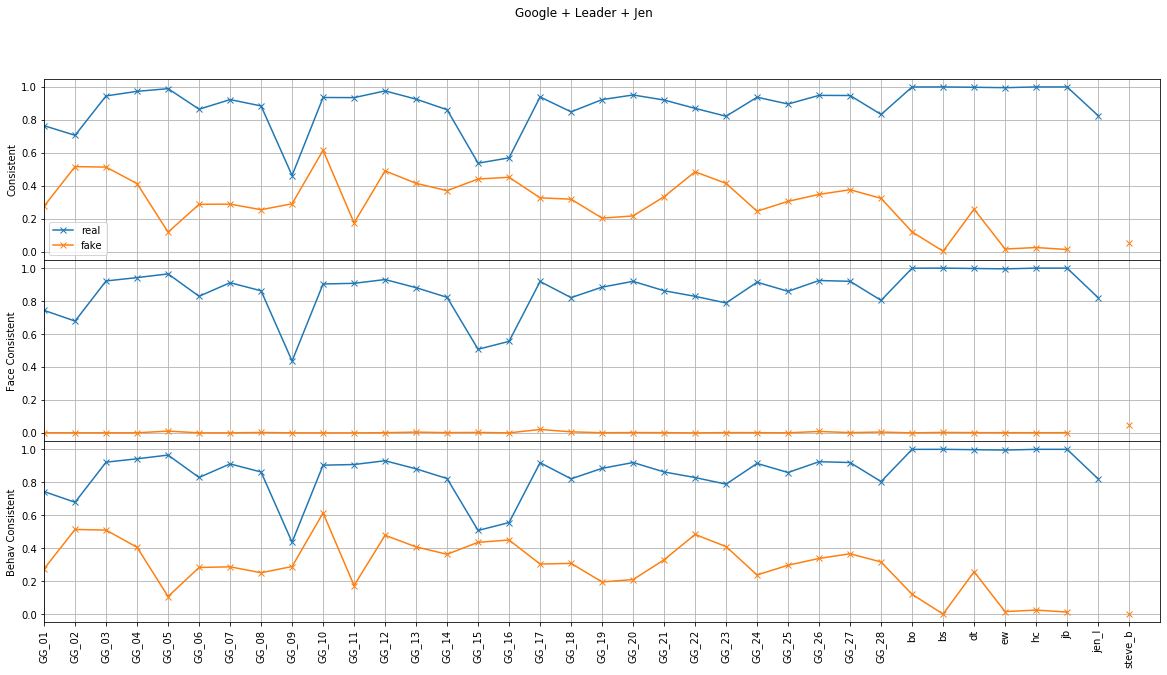

In [8]:

real_dict = get_xy_data(['ldr_real_notime.csv', 'FF_real_notime.csv', 
                         'GG_real_notime.csv', 'SJ_real_notime.csv'])
fake_dict = get_xy_data(['ldr_fake_notime.csv', 'FF_fake_notime.csv', 
                         'GG_fake_notime.csv', 'SJ_fake_notime.csv'])

plot_consistent(real_dict, fake_dict, ['FF_{0:03d}'.format(f) for f in range(1000)], 'FaceForensics', '-')

plot_consistent(real_dict, fake_dict, 
                ['GG_{0:02d}'.format(f+1) for f in range(28)] + ['bo','bs','dt','ew','hc','jb'] + ['jen_l'] 
                + ['steve_b'], 
                'Google + Leader + Jen', '-x')


steve_b
jen_l


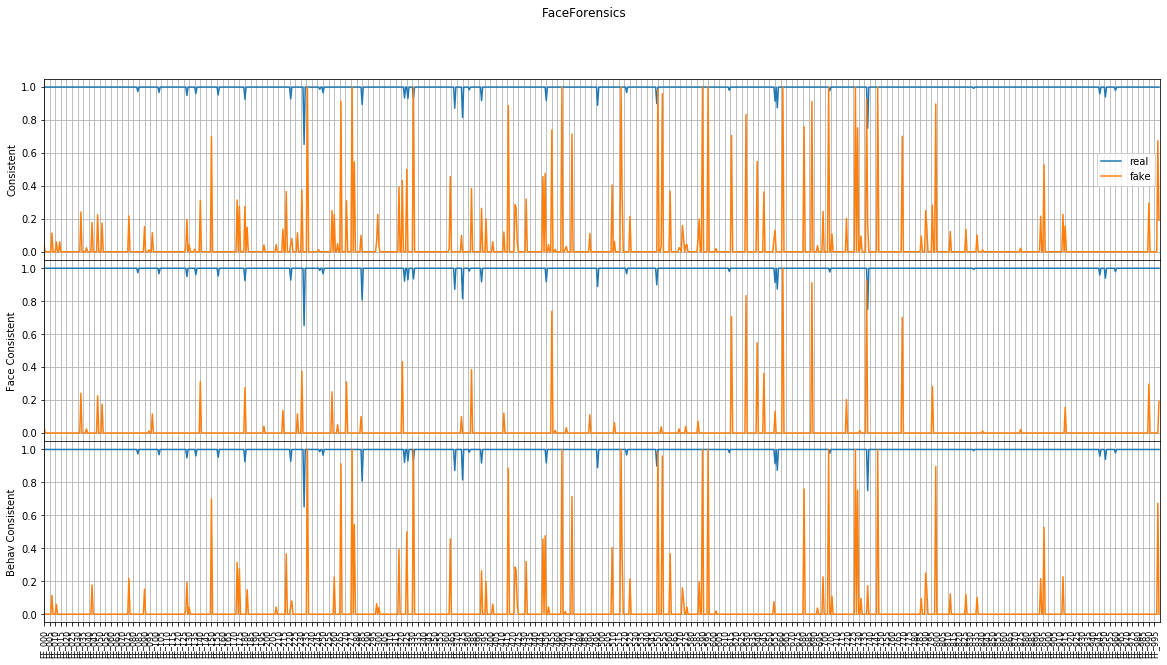

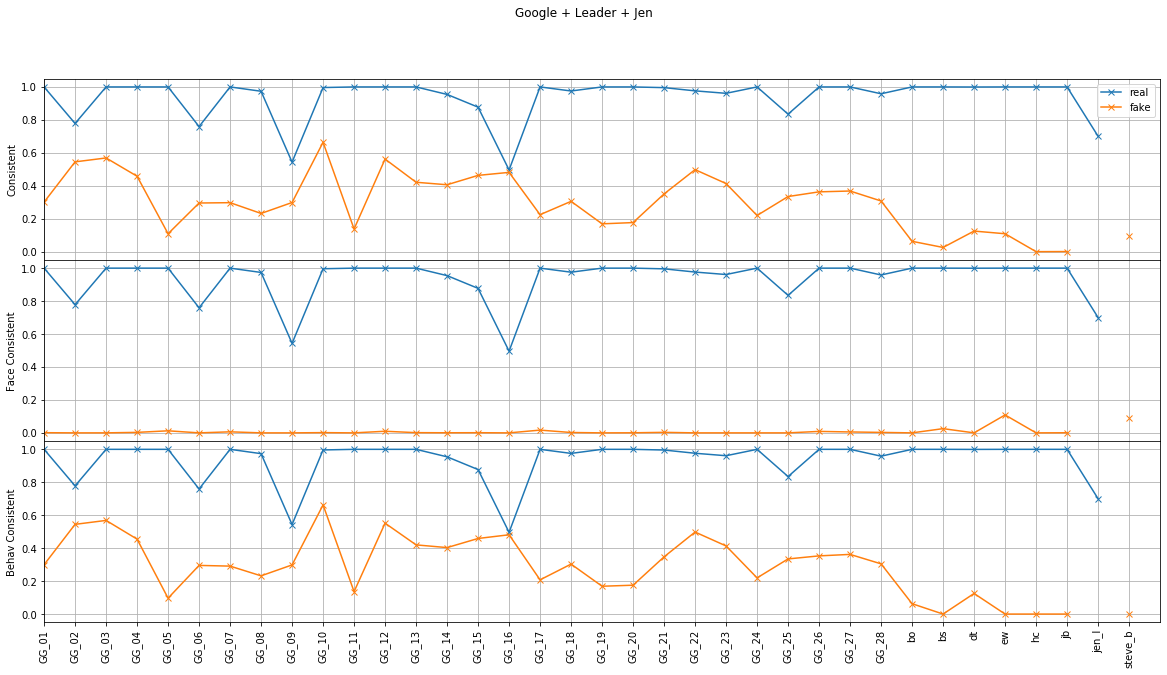

In [13]:
real_dict_100 = get_xy_data(['ldr_real_100.csv', 'FF_real_100.csv', 
                         'GG_real_100.csv', 'SJ_real_100.csv'])
fake_dict_100 = get_xy_data(['ldr_fake_100.csv', 'FF_fake_100.csv', 
                         'GG_fake_100.csv', 'SJ_fake_100.csv'])

plot_consistent(real_dict_100, fake_dict_100, ['FF_{0:03d}'.format(f) for f in range(1000)], 'FaceForensics', '-')

plot_consistent(real_dict_100, fake_dict_100, 
                ['GG_{0:02d}'.format(f+1) for f in range(28)] + ['bo','bs','dt','ew','hc','jb'] + ['jen_l'] + ['steve_b'], 
                'Google + Leader + Jen', '-x')

In [ ]:
real_dict = get_xy_data(['ldr_real_vggfabpool.csv', 'FF_real_vggfabpool.csv', 
                         'GG_real_vggfabpool.csv', 'SJ_real_vggfabpool.csv'])
fake_dict = get_xy_data(['ldr_fake_vggfabpool.csv', 'FF_fake_vggfabpool.csv', 
                         'GG_fake_vggfabpool.csv', 'SJ_fake_vggfabpool.csv'])

plot_consistent(real_dict, fake_dict, ['FF_{0:03d}'.format(f) for f in range(1000)], 'FaceForensics', '-')
plot_consistent(real_dict, fake_dict, 
                ['GG_{0:02d}'.format(f+1) for f in range(28)] + ['bo','bs','dt','ew','hc','jb'] + ['jen_l'] + ['steve_b'], 
                'Google + Leader + Jen', '-x')

### full images

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image(im_real, ax[0], 'real')
display_image(im_fake, ax[1], 'fake')
plt.show()

### google

In [ ]:
def display_image_lbls(img, ax, ttl, inlbl):
    
    add_colorbar(ax.imshow(img, vmin=0, vmax=100))
    ax.set_title(ttl)
    ax.set_xticks(range(len(inlbl))); ax.set_yticks(range(len(inlbl)))
    ax.set_xticklabels(inlbl, rotation=90); ax.set_yticklabels(inlbl)
    ax.set_ylabel('VGG')
    ax.set_xlabel('fabnet')
    

In [ ]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['GG_{0:02d}'.format(f+1) for f in range(28)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

### only leaders

In [ ]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['bo','bs','dt','ew','hc','jb', 
                              'bo_imposter', 'bs_imposter', 
                              'ew_imposter', 'dt_imposter', 
                             'hc_imposter', 'jb_imposter'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

## no time 

In [ ]:
fab_df_nt = pd.read_csv('results1_fabnet.csv')# fabnet_df
vgg_df_nt = pd.read_csv('results1_vgg.csv')# vgg_df

In [ ]:
# create a map between labels and a number, fix this map to the train repo used.
all_lbls = list(train_files.keys())
all_lbls.sort()
all_lbls = np.array(all_lbls)

im_real = get_image(vgg_df_nt, fab_df_nt, list(test_files['real'].keys()), 'real', all_lbls)
im_fake = get_image(vgg_df_nt, fab_df_nt, list(test_files['fake'].keys()), 'fake', all_lbls)

In [ ]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['GG_{0:02d}'.format(f+1) for f in range(28)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

In [ ]:
# create a map between labels and a number, fix this map to the train repo used.
cur_lbls = np.isin(all_lbls, ['bo','bs','dt','ew','hc','jb', 
                              'bo_imposter', 'bs_imposter', 
                              'ew_imposter', 'dt_imposter', 
                             'hc_imposter', 'jb_imposter'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
# display the images
display_image_lbls(im_real[cur_lbls, :][:, cur_lbls], ax[0], 'real', all_lbls[cur_lbls])
display_image_lbls(im_fake[cur_lbls, :][:, cur_lbls], ax[1], 'fake', all_lbls[cur_lbls])
plt.show()

# steve buschemi + Jennifer Lawrence

In [ ]:
# repo with leaders + ff original + imposters + Google + steve+jenn
def get_train_repo5(params):
    
    out_repo = {}
    # leaders
    out_repo = build_repo(params['bsfldr'], 
                      {f: train_files[f] for f in ['bo','br','bs','cb','dt','ew','hc','jb','kh', 'pb',
                                                  'bo_imposter','bs_imposter','ew_imposter','dt_imposter',
                                                   'hc_imposter', 'jb_imposter']}, 
                      {'frames': params['frames'], 'step': params['steps'], 
                       'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                      in_dict=out_repo)
    # ff original
    out_repo = build_repo(params['bsfldr'], 
                  {'FF_{0:03d}'.format(f): train_files['FF_{0:03d}'.format(f)] for f in range(1000)}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':0.5}, 
                  in_dict=out_repo)

    # Google 
    out_repo = build_repo(params['bsfldr'], 
                  {'GG_{0:02d}'.format(f+1): train_files['GG_{0:02d}'.format(f+1)] for f in range(28)}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                  in_dict=out_repo)
    
    # steve + jennifer
    out_repo = build_repo(params['bsfldr'], 
                  {'steve_b': train_files['steve_b']}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                  in_dict=out_repo)
    out_repo = build_repo(params['bsfldr'], 
                  {'jen_l': train_files['jen_l']}, 
                  {'frames': params['frames'], 'step': params['steps'], 
                   'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                  in_dict=out_repo)

    return out_repo

In [ ]:

# test the steve bushemi faceswap
def get_result_df(in_train_repo, params, in_test_dict, r_or_f):

    test_keys = np.sort(list(in_test_dict.keys()))
    r_or_f_res = {}
    for ids in test_keys:
        cur_test = {}
        cur_test = build_repo(params['bsfldr'], 
                              {ids: in_test_dict[ids]}, 
                              {'frames': params['frames'], 'step': params['steps'], 
                               'pool_func': np.mean, 'N': 5000, 'n1':0, 'n2':1}, 
                              in_dict=cur_test)

        cur_max, cur_pred_id = get_repo_dist(in_train_repo, cur_test[ids])
        r_or_f_res[ids] = pd.DataFrame(data=cur_max, columns=['dist'])
        r_or_f_res[ids]['predLabel'] = cur_pred_id
        r_or_f_res[ids]['actualLabel'] = ids
        r_or_f_res[ids]['RealFake'] = r_or_f

    return pd.concat([r_or_f_res[f] for f in test_keys], ignore_index=True, sort=False)



In [ ]:
# repo with leaders
vgg_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                            'frames':100, 'steps':5})
vgg_result_df = get_result_df(vgg_repo, {'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                                      'frames':100, 'steps':5},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')

In [ ]:
vgg_result_df['predLabel'].value_counts()

In [ ]:
# repo with leaders
fab_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/fabnet_metric/', 
                            'frames':1, 'steps':1})

fab_result_df = get_result_df(fab_repo, {'bsfldr':'/data/home/shruti/voxceleb/fabnet_metric/', 
                                      'frames':1, 'steps':1},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')
fab_result_df['predLabel'].value_counts()

In [ ]:
fab_result_df['predLabel'].value_counts()

#### no time

In [ ]:
# repo with leaders
vgg_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                            'frames':1, 'steps':1})
vgg_result_df_nt = get_result_df(vgg_repo, {'bsfldr':'/data/home/shruti/voxceleb/vgg/leaders/', 
                                      'frames':1, 'steps':1},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')
vgg_result_df_nt['predLabel'].value_counts()

In [ ]:
# repo with leaders
fab_repo = get_train_repo5({'istrain':True, 'bsfldr':'/data/home/shruti/voxceleb/fabnet/leaders', 
                            'frames':1, 'steps':1})

fab_result_df_nt = get_result_df(fab_repo, {'bsfldr':'/data/home/shruti/voxceleb/fabnet/leaders', 
                                      'frames':1, 'steps':1},
                           {'steve_b': test_files['fake']['steve_b']}, 'fake')
fab_result_df_nt['predLabel'].value_counts()